In [3]:
#KNN Classification
## importing of necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [4]:
#Import Data
filepath='C:/Users/Fadilah Thasnim/Desktop/Academics/6 - Semester/3. ML/Lab/KNN/cancer_data.csv'
dataset=pd.read_csv(filepath)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#dropping unneccesary columns 
dataset.drop(dataset.columns[[-1, 0]], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
#count of Benign and Malignant Cancer according to the diagnosis
print ("Total number of diagnosis are ", str(dataset.shape[0]), ", ", dataset.diagnosis.value_counts()['B'], "Benign and Malignant are",
       dataset.diagnosis.value_counts()['M'])

Total number of diagnosis are  569 ,  357 Benign and Malignant are 212


In [7]:
from sklearn.model_selection import train_test_split
featureMeans = list(dataset.columns[1:11])
X = dataset.loc[:,featureMeans]
y = dataset.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
#kNN classification
from sklearn.neighbors import KNeighborsClassifier
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train) #fitting the training dataset to the model

KNeighborsClassifier(n_neighbors=3)

In [9]:
#testing trained model
prediction = knn.predict(X_test)

In [10]:
#comparision of actual and predicted results
from sklearn import metrics
print("\n Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, prediction)))


 Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           B       0.91      0.94      0.92        71
           M       0.90      0.84      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114




<IPython.core.display.Javascript object>


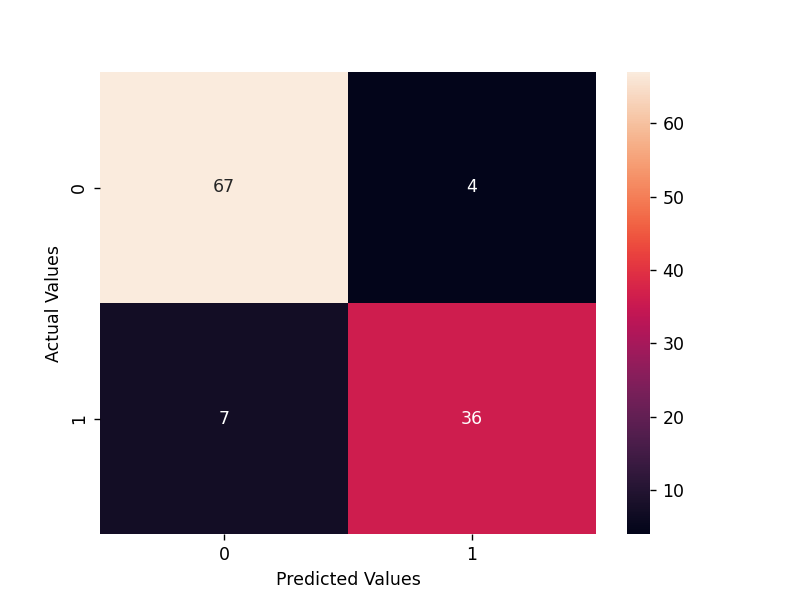

In [12]:
##plotting the Confusion Matrix 
##goal to find if the given tumor is malignant or benign

#print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

from sklearn.metrics import confusion_matrix as cm

cm1 = cm(y_test, prediction)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [23]:
knn_probs = knn.predict_proba(X_test)
knn_probs = knn_probs[:,1]
knn_auc = roc_auc_score(y_test,knn_probs)
print('KNN: AUROCI = % 0.3f' % (knn_auc))

KNN: AUROCI =  0.943


In [25]:
from sklearn.preprocessing import LabelEncoder
numData=LabelEncoder()
#to convert diagnosis Data
y_test = numData.fit_transform(y_test)
knn_fpr, knn_tpr, _= roc_curve(y_test,knn_probs)

<IPython.core.display.Javascript object>


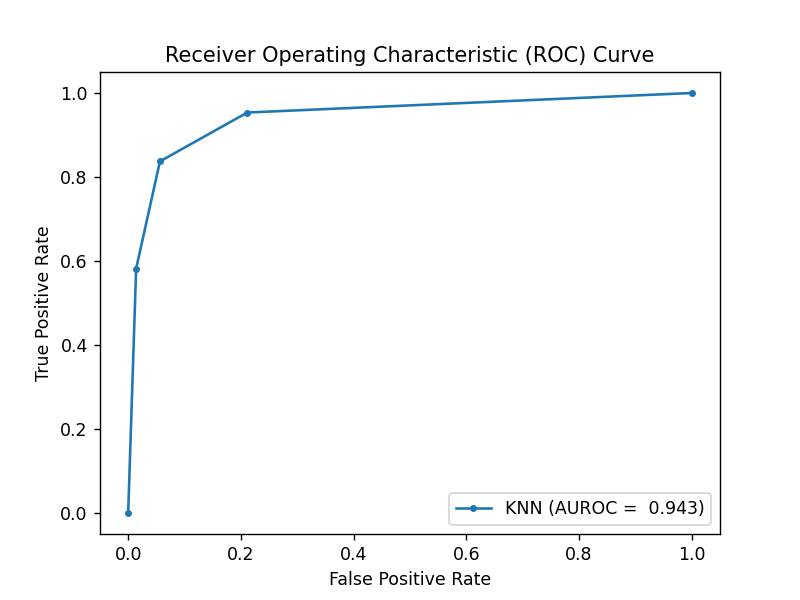

In [26]:
plt.plot(knn_fpr, knn_tpr, marker ='.' , label='KNN (AUROC = % 0.3f)' % knn_auc)
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()